In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
from csv import reader
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date
from pyspark.sql.functions import year, month
# Conver start date and end date to timestamp
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *
import os
from pyspark.ml.feature import StringIndexer, VectorAssembler, ChiSqSelector
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

In [ ]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

In [ ]:
import mlflow
import mlflow.spark
import seaborn as sns

In [ ]:
# Import the necessary Spark libraries
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder.appName("CrimePrediction").getOrCreate()


In [ ]:
df1 = spark.read.csv('/content/Indian_Crime_Dataset_5000-2.csv', header=True, inferSchema=True)
df1.show(10)


+----------+------------+-------------------+------------+-------------------+----------+-----+-----------------+-----+----------------+----------------+-----------+------------------+-----------+-----------+-----------------+----------------+---------+----------+----------+----------+-----------+-----------+--------------------+----------------+--------------------+-------+-------------+-----------+--------------+-----------+--------+----------------+-----------------+-----------+
|CMPLNT_NUM|CMPLNT_FR_DT|       CMPLNT_FR_TM|CMPLNT_TO_DT|       CMPLNT_TO_TM|    RPT_DT|KY_CD|        OFNS_DESC|PD_CD|         PD_DESC|CRM_ATPT_CPTD_CD| LAW_CAT_CD|        JURIS_DESC|    BORO_NM|ADDR_PCT_CD|LOC_OF_OCCUR_DESC|   PREM_TYP_DESC| PARKS_NM|HADEVELOPT|X_COORD_CD|Y_COORD_CD|   Latitude|  Longitude|             Lat_Lon|     PATROL_BORO|        STATION_NAME|VIC_SEX|VIC_AGE_GROUP|   VIC_RACE|SUSP_AGE_GROUP|  SUSP_RACE|SUSP_SEX|TRANSIT_DISTRICT|JURISDICTION_CODE|HOUSING_PSA|
+----------+------------+-

In [ ]:
df1.count()

5000

In [ ]:
df1.describe()

DataFrame[summary: string, CMPLNT_NUM: string, KY_CD: string, OFNS_DESC: string, PD_CD: string, PD_DESC: string, CRM_ATPT_CPTD_CD: string, LAW_CAT_CD: string, JURIS_DESC: string, BORO_NM: string, ADDR_PCT_CD: string, LOC_OF_OCCUR_DESC: string, PREM_TYP_DESC: string, PARKS_NM: string, HADEVELOPT: string, X_COORD_CD: string, Y_COORD_CD: string, Latitude: string, Longitude: string, Lat_Lon: string, PATROL_BORO: string, STATION_NAME: string, VIC_SEX: string, VIC_AGE_GROUP: string, VIC_RACE: string, SUSP_AGE_GROUP: string, SUSP_RACE: string, SUSP_SEX: string, TRANSIT_DISTRICT: string, JURISDICTION_CODE: string, HOUSING_PSA: string]

In [ ]:
df1.printSchema()

root
 |-- CMPLNT_NUM: long (nullable = true)
 |-- CMPLNT_FR_DT: date (nullable = true)
 |-- CMPLNT_FR_TM: timestamp (nullable = true)
 |-- CMPLNT_TO_DT: date (nullable = true)
 |-- CMPLNT_TO_TM: timestamp (nullable = true)
 |-- RPT_DT: date (nullable = true)
 |-- KY_CD: integer (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- PD_CD: integer (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- CRM_ATPT_CPTD_CD: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- JURIS_DESC: string (nullable = true)
 |-- BORO_NM: string (nullable = true)
 |-- ADDR_PCT_CD: integer (nullable = true)
 |-- LOC_OF_OCCUR_DESC: string (nullable = true)
 |-- PREM_TYP_DESC: string (nullable = true)
 |-- PARKS_NM: string (nullable = true)
 |-- HADEVELOPT: string (nullable = true)
 |-- X_COORD_CD: integer (nullable = true)
 |-- Y_COORD_CD: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Lat_Lon: string (nulla

In [ ]:
df1.columns

['CMPLNT_NUM',
 'CMPLNT_FR_DT',
 'CMPLNT_FR_TM',
 'CMPLNT_TO_DT',
 'CMPLNT_TO_TM',
 'RPT_DT',
 'KY_CD',
 'OFNS_DESC',
 'PD_CD',
 'PD_DESC',
 'CRM_ATPT_CPTD_CD',
 'LAW_CAT_CD',
 'JURIS_DESC',
 'BORO_NM',
 'ADDR_PCT_CD',
 'LOC_OF_OCCUR_DESC',
 'PREM_TYP_DESC',
 'PARKS_NM',
 'HADEVELOPT',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'Lat_Lon',
 'PATROL_BORO',
 'STATION_NAME',
 'VIC_SEX',
 'VIC_AGE_GROUP',
 'VIC_RACE',
 'SUSP_AGE_GROUP',
 'SUSP_RACE',
 'SUSP_SEX',
 'TRANSIT_DISTRICT',
 'JURISDICTION_CODE',
 'HOUSING_PSA']

In [ ]:
df1 = df1.withColumn('Start_Date', to_timestamp('CMPLNT_FR_DT', 'MM/dd/yyyy'))
# Cast the data type to Date
df1 = df1.withColumn('Date', to_date('Start_Date'))
df1 = df1.withColumn('Hour', hour(df1['CMPLNT_FR_TM']))
# Create a new column of year number
df1 = df1.withColumn('YEAR', year('Date'))
# Create a new column of month number
df1 = df1.withColumn('MONTH', month('Date'))
#Create a new column 'day_of_week' from 'date'
df1 = df1.withColumn("DoW", date_format("Date", "E"))

In [ ]:
df1 = df1.withColumn('VIC_AGE_Cat',
    when(df1.VIC_AGE_GROUP == '<18', 'Teenager')
    .when(df1.VIC_AGE_GROUP == '18-25', 'Young Adult')
    .when(df1.VIC_AGE_GROUP == '25-44', 'Middle Age')
    .when(df1.VIC_AGE_GROUP == '44-64', 'Mid Old')
    .otherwise('Senior'))

In [ ]:
df1 = df1.drop("PARKS_NM", "VIC_AGE_GROUP", "VIC_RACE", "STATION_NAME", "PATROL_BORO", "TRANSIT_DISTRICT",
             "SUSP_SEX", "SUSP_RACE", "SUSP_AGE_GROUP", "X_COORD_CD", "Y_COORD_CD", "HOUSING_PSA", "HADEVELOPT",
             "JURISDICTION_CODE", "JURIS_DESC", "JURIS_DESC", "RPT_DT", "JURIS_DESC", "PREM_TYP_DESC",
             "PD_CD", "PD_DESC", "CMPLNT_TO_TM", "CMPLNT_TO_DT", "CMPLNT_FR_DT", "LOC_OF_OCCUR_DESC", "CMPLNT_FR_TM","Start_Date")

In [ ]:
df1.show(10)

+----------+-----+-----------------+----------------+-----------+-----------+-----------+-----------+-----------+--------------------+-------+----------+----+----+-----+---+-----------+
|CMPLNT_NUM|KY_CD|        OFNS_DESC|CRM_ATPT_CPTD_CD| LAW_CAT_CD|    BORO_NM|ADDR_PCT_CD|   Latitude|  Longitude|             Lat_Lon|VIC_SEX|      Date|Hour|YEAR|MONTH|DoW|VIC_AGE_Cat|
+----------+-----+-----------------+----------------+-----------+-----------+-----------+-----------+-----------+--------------------+-------+----------+----+----+-----+---+-----------+
|6325701240|  290| Drug Trafficking|       ATTEMPTED|MISDEMEANOR|    Gujarat|          2|-86.8081785|   1.830798|-19.5651005, -122...|      M|2023-07-26|  13|2023|    7|Wed|   Teenager|
|4257759773|  832| Drug Trafficking|       ATTEMPTED|MISDEMEANOR|Maharashtra|         60|  69.927953|  92.990214|61.8808255, 137.7...|      M|2022-08-29|  11|2022|    8|Mon|   Teenager|
|9098099408|  866|      Cyber Crime|       ATTEMPTED|  VIOLATION|    G

In [ ]:
df1 = df1.toDF('Complaint_ID', 'Neighborhood', 'Offence_Code', 'Offence_Type',
        'Status','Offence_Level','Borough','Latitude','Longitude','Lat_Lon', 'Victim_Sex', 'Date', 'Hour', 'Year', 'Month', 'DoW','Victim_Agegroup')

In [ ]:
mean_log = df1.agg({'Longitude': 'mean'}).collect()[0][0]
df1 = df1.fillna(mean_log, subset=['Longitude'])

mean_lat = df1.agg({'Latitude': 'mean'}).collect()[0][0]
df1 = df1.fillna(mean_lat, subset=['Latitude'])

df1 = df1.fillna(-1, subset=['Borough','Neighborhood','Offence_Code','Offence_Type','Status','Offence_level','Victim_Sex'])
df1 = df1.na.drop('any')

In [ ]:
df1.show(10)

+------------+------------+-----------------+------------+-----------+-------------+-------+-----------+-----------+--------------------+----------+----------+----+----+-----+---+---------------+
|Complaint_ID|Neighborhood|     Offence_Code|Offence_Type|     Status|Offence_Level|Borough|   Latitude|  Longitude|             Lat_Lon|Victim_Sex|      Date|Hour|Year|Month|DoW|Victim_Agegroup|
+------------+------------+-----------------+------------+-----------+-------------+-------+-----------+-----------+--------------------+----------+----------+----+----+-----+---+---------------+
|  6325701240|         290| Drug Trafficking|   ATTEMPTED|MISDEMEANOR|      Gujarat|      2|-86.8081785|   1.830798|-19.5651005, -122...|         M|2023-07-26|  13|2023|    7|Wed|       Teenager|
|  4257759773|         832| Drug Trafficking|   ATTEMPTED|MISDEMEANOR|  Maharashtra|     60|  69.927953|  92.990214|61.8808255, 137.7...|         M|2022-08-29|  11|2022|    8|Mon|       Teenager|
|  9098099408|      

In [ ]:
df = df1

In [ ]:
df.show()

+------------+------------+-----------------+------------+-----------+-------------+-------+-----------+-----------+--------------------+----------+----------+----+----+-----+---+---------------+
|Complaint_ID|Neighborhood|     Offence_Code|Offence_Type|     Status|Offence_Level|Borough|   Latitude|  Longitude|             Lat_Lon|Victim_Sex|      Date|Hour|Year|Month|DoW|Victim_Agegroup|
+------------+------------+-----------------+------------+-----------+-------------+-------+-----------+-----------+--------------------+----------+----------+----+----+-----+---+---------------+
|  6325701240|         290| Drug Trafficking|   ATTEMPTED|MISDEMEANOR|      Gujarat|      2|-86.8081785|   1.830798|-19.5651005, -122...|         M|2023-07-26|  13|2023|    7|Wed|       Teenager|
|  4257759773|         832| Drug Trafficking|   ATTEMPTED|MISDEMEANOR|  Maharashtra|     60|  69.927953|  92.990214|61.8808255, 137.7...|         M|2022-08-29|  11|2022|    8|Mon|       Teenager|
|  9098099408|      

In [ ]:
df = df.drop('Complaint_ID')

In [ ]:
#creating database

spark.sql("drop database if exists indiadatabase cascade")
spark.sql("create database indiadatabase");
df.write.mode("overwrite").saveAsTable("indiadatabase.df")

In [ ]:
# databrick
display(spark.sql("select Borough,count(*) as Count from indiadatabase.df group by Borough order by Count desc limit 5"))

DataFrame[Borough: int, Count: bigint]

In [ ]:
# databrick
display(spark.sql("select Offence_Level,count(*) as Count from indiadatabase.df group by Offence_Level"))

DataFrame[Offence_Level: string, Count: bigint]

In [ ]:
# databrick
display(spark.sql("select Offence_Level,Victim_Sex,count(*) as Count from indiadatabase.df group by Offence_Level,Victim_Sex"))

DataFrame[Offence_Level: string, Victim_Sex: string, Count: bigint]

In [ ]:
# databrick
display(spark.sql("select Offence_Type,count(*) as Count from indiadatabase.df group by Offence_Type order by Count desc limit 10"))

DataFrame[Offence_Type: string, Count: bigint]

In [ ]:
# databrick
display(spark.sql("select Offence_Level,Year,count(*) as Count from indiadatabase.df group by Offence_Level, Year"))

DataFrame[Offence_Level: string, Year: int, Count: bigint]

In [ ]:
# databrick
display(spark.sql("select Victim_Agegroup,count(*) as Count from indiadatabase.df group by Victim_Agegroup"))

DataFrame[Victim_Agegroup: string, Count: bigint]

In [ ]:
# databrick
display(spark.sql("select Year,count(*) as Count from indiadatabase.df group by Year"))

DataFrame[Year: int, Count: bigint]

In [ ]:
# databrick
display(spark.sql("select Month,count(*) as Count from indiadatabase.df group by Month"))

DataFrame[Month: int, Count: bigint]

In [ ]:
maxBins = 70
str_featues = []
num_features = []

for feature in df.dtypes:

    # print unique value and data type for each feature
    feature_name = str(feature[0])
    feature_type = str(feature[1])
    uni = df.select(feature_name).distinct().count()
    print("unique number of {} ({}):".format(feature_name, feature_type),uni)

    # find out features with integer type
    if feature_type == "int" or feature_type == "decimal(65,0)":

        num_features.append(feature_name)

    # find out string feature and it's unique value less than maxBins
    elif feature_type == "string" and uni < maxBins:

        str_featues.append(feature_name)

unique number of Neighborhood (int): 900
unique number of Offence_Code (string): 10
unique number of Offence_Type (string): 2
unique number of Status (string): 3
unique number of Offence_Level (string): 10
unique number of Borough (int): 100
unique number of Latitude (double): 5000
unique number of Longitude (double): 5000
unique number of Lat_Lon (string): 5000
unique number of Victim_Sex (string): 2
unique number of Date (date): 1660
unique number of Hour (int): 24
unique number of Year (int): 5
unique number of Month (int): 12
unique number of DoW (string): 7
unique number of Victim_Agegroup (string): 3


In [ ]:
print("Total {} numerical features:{}".format(len(num_features),num_features))
print("Total {} string features:{}".format(len(str_featues),str_featues))

Total 5 numerical features:['Neighborhood', 'Borough', 'Hour', 'Year', 'Month']
Total 7 string features:['Offence_Code', 'Offence_Type', 'Status', 'Offence_Level', 'Victim_Sex', 'DoW', 'Victim_Agegroup']


In [ ]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in str_featues]

In [ ]:
index_names = ["{}_index".format(x) for x in str_featues] + num_features
assembler = VectorAssembler(inputCols= list(set(index_names) - set('Offence_Level_index')), outputCol="features")

In [ ]:
pipeline = Pipeline(stages=indexers+[assembler])
data = pipeline.fit(df).transform(df)

In [ ]:
# select feature col
input_data = data.select(["features","Offence_Level_index"])
input_data = input_data.withColumnRenamed("Offence_Level_index","label")
# split dataset into train set and test set
train_data, test_data = input_data.randomSplit([.8,.2])

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',
                                          metricName='accuracy')

In [ ]:
def classification_report_pyspark(metrics_multiclass,preds_and_labels, labels_list):
    #import math
    columns = ['target_class', 'precision', 'recall', 'f1-score', 'support']

    data = []
    for i in labels_list:
        support = preds_and_labels.where('label = ' + str(i)).count()
        data.append((str(i), float(np.round(metrics_multiclass.precision(label = i),3)),
                     float(np.round(metrics_multiclass.recall(label = i), 3)),
                     float(np.round(metrics_multiclass.fMeasure(i), 3)), support)),

    data.append(('weighted avg', float(np.round(metrics_multiclass.weightedPrecision, 3)),
                                 float(np.round(metrics_multiclass.weightedRecall, 3)),
                                   float(np.round(metrics_multiclass.weightedFMeasure(), 3)), preds_and_labels.count() ))
    class_rep = spark.createDataFrame(data, columns)
    return class_rep

In [ ]:
lg_model = LogisticRegression(labelCol='label', maxIter=2, elasticNetParam=1, regParam=0.5,threshold=0.3)
lg_model = lg_model.fit(train_data)
lg_pred = lg_model.transform(test_data)
evaluator.evaluate(lg_pred)

0.10380267214799589

In [ ]:
lg_preds_and_labels = lg_pred.select(['prediction','label'])
lg_metrics = MulticlassMetrics(lg_preds_and_labels.rdd.map(tuple))
lg_metrics.confusionMatrix().toArray()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


array([[101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [109.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [106.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 82.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [110.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 99.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 80.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 85.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
pd.DataFrame(lg_metrics.confusionMatrix().toArray())

,0,1,2,3,4,5,6,7,8,9
0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

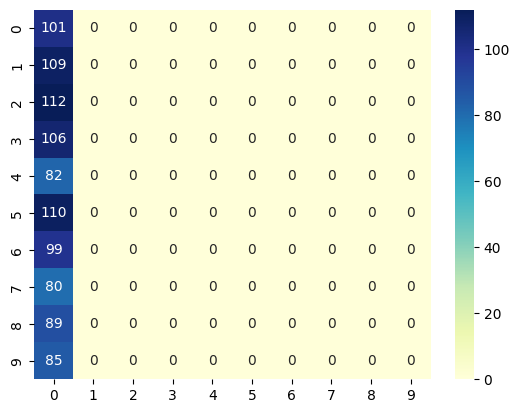

In [ ]:
sns.heatmap(pd.DataFrame(lg_metrics.confusionMatrix().toArray()), annot=True, cmap="YlGnBu" ,fmt='g')

In [ ]:
lg_class_rep = classification_report_pyspark(lg_metrics, lg_preds_and_labels, [0.0, 1.0, 2.0])
lg_class_rep.show()

+------------+---------+------+--------+-------+
|target_class|precision|recall|f1-score|support|
+------------+---------+------+--------+-------+
|         0.0|    0.104|   1.0|   0.188|    101|
|         1.0|      0.0|   0.0|     0.0|    109|
|         2.0|      0.0|   0.0|     0.0|    112|
|weighted avg|    0.011| 0.104|    0.02|    973|
+------------+---------+------+--------+-------+



In [ ]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Logistic Regression Model
lg_model = LogisticRegression(labelCol='label', maxIter=100, elasticNetParam=0.5, regParam=0.01)

# Random Forest Model
rf_model = RandomForestClassifier(labelCol='label', numTrees=100, maxDepth=10)

# Param Grid for Cross Validation
paramGrid_lg = ParamGridBuilder().addGrid(lg_model.regParam, [0.01, 0.1]).build()
paramGrid_rf = ParamGridBuilder().addGrid(rf_model.numTrees, [50, 100]).build()

# Evaluator
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')

# Cross Validator for Logistic Regression
crossval_lg = CrossValidator(estimator=lg_model,
                             estimatorParamMaps=paramGrid_lg,
                             evaluator=evaluator,
                             numFolds=3)  # 3-fold cross-validation

# Cross Validator for Random Forest
crossval_rf = CrossValidator(estimator=rf_model,
                             estimatorParamMaps=paramGrid_rf,
                             evaluator=evaluator,
                             numFolds=3)  # 3-fold cross-validation

# Fit Logistic Regression Model
lg_cv_model = crossval_lg.fit(train_data)
lg_predictions = lg_cv_model.transform(test_data)
lg_accuracy = evaluator.evaluate(lg_predictions)

# Print Logistic Regression Accuracy
print("Logistic Regression Accuracy:", lg_accuracy)

# Fit Random Forest Model
rf_cv_model = crossval_rf.fit(train_data)
rf_predictions = rf_cv_model.transform(test_data)
rf_accuracy = evaluator.evaluate(rf_predictions)

# Print Random Forest Accuracy
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.538540596094553
Random Forest Accuracy: 1.0


In [ ]:
rf_model = RandomForestClassifier(labelCol='label',maxBins=75,numTrees=3,maxDepth=3)
rf_model = rf_model.fit(train_data)
rf_pred = rf_model.transform(test_data)
evaluator.evaluate(rf_pred)

0.33093525179856115

In [ ]:
rf_preds_and_labels = rf_pred.select(['prediction','label'])
rf_metrics = MulticlassMetrics(rf_preds_and_labels.rdd.map(tuple))
rf_metrics.confusionMatrix().toArray()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


array([[101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 107.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   1.,  40.,   0.,  60.,   0.,   2.,   9.,   0.,   0.],
       [  0.,   0.,  44.,   0.,  51.,   0.,   2.,   9.,   0.,   0.],
       [  0.,   2.,  26.,   0.,  41.,   0.,   2.,  11.,   0.,   0.],
       [  0.,   0.,  46.,   0.,  54.,   0.,   1.,   9.,   0.,   0.],
       [  0.,   0.,  37.,   0.,  53.,   0.,   3.,   6.,   0.,   0.],
       [  0.,   0.,  35.,   0.,  32.,   0.,   6.,   7.,   0.,   0.],
       [  0.,   0.,  37.,   0.,  39.,   0.,   8.,   5.,   0.,   0.],
       [  0.,   0.,  33.,   0.,  20.,   0.,   5.,   4.,   0.,  23.]])

In [ ]:
pd.DataFrame(rf_metrics.confusionMatrix().toArray())

,0,1,2,3,4,5,6,7,8,9
0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,107.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,40.0,0.0,60.0,0.0,2.0,9.0,0.0,0.0
3,0.0,0.0,44.0,0.0,51.0,0.0,2.0,9.0,0.0,0.0
4,0.0,2.0,26.0,0.0,41.0,0.0,2.0,11.0,0.0,0.0
5,0.0,0.0,46.0,0.0,54.0,0.0,1.0,9.0,0.0,0.0
6,0.0,0.0,37.0,0.0,53.0,0.0,3.0,6.0,0.0,0.0
7,0.0,0.0,35.0,0.0,32.0,0.0,6.0,7.0,0.0,0.0
8,0.0,0.0,37.0,0.0,39.0,0.0,8.0,5.0,0.0,0.0
9,0.0,0.0,33.0,0.0,20.0,0.0,5.0,4.0,0.0,23.0


<Axes: >

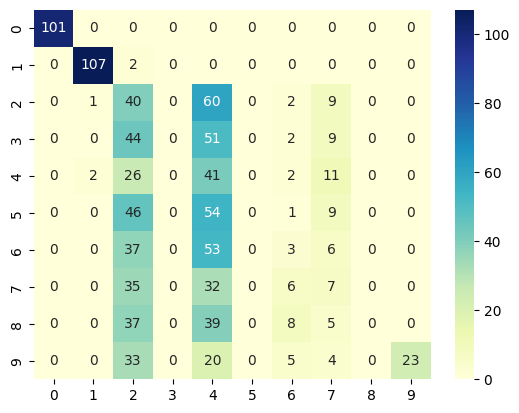

In [ ]:
sns.heatmap(pd.DataFrame(rf_metrics.confusionMatrix().toArray()), annot=True, cmap="YlGnBu" ,fmt='g')

In [ ]:
rf_class_rep = classification_report_pyspark(rf_metrics, rf_preds_and_labels, [0.0, 1.0, 2.0])
rf_class_rep.show()

+------------+---------+------+--------+-------+
|target_class|precision|recall|f1-score|support|
+------------+---------+------+--------+-------+
|         0.0|      1.0|   1.0|     1.0|    101|
|         1.0|    0.973| 0.982|   0.977|    109|
|         2.0|    0.133| 0.357|   0.194|    112|
|weighted avg|    0.345| 0.331|   0.302|    973|
+------------+---------+------+--------+-------+



corresponding visuals to databricks in matplotliba nd seaborn and pandas

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-49-97ab969bbce8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=borough_df, x='Borough', y='Count', palette='viridis')


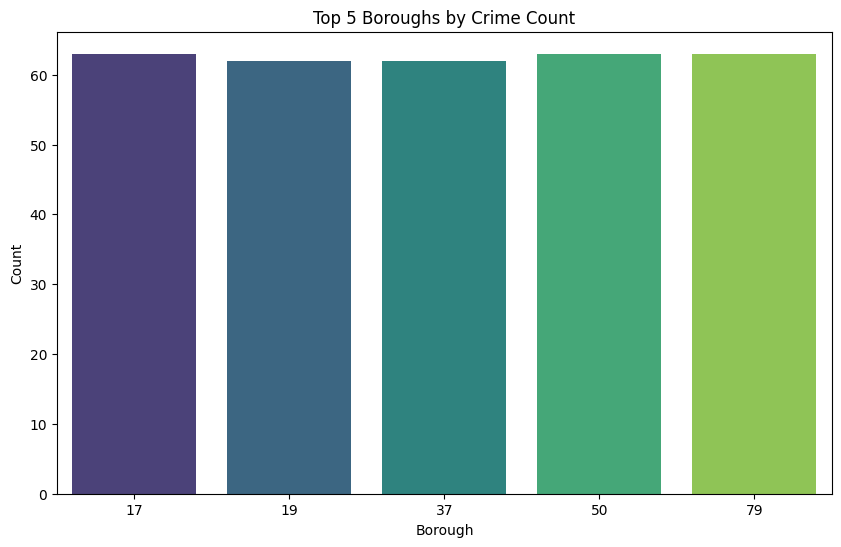

In [ ]:
# Top 5 Boroughs by Crime Count
# Run SQL query and convert to Pandas
borough_df = spark.sql("SELECT Borough, COUNT(*) AS Count FROM indiadatabase.df GROUP BY Borough ORDER BY Count DESC LIMIT 5").toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=borough_df, x='Borough', y='Count', palette='viridis')
plt.title("Top 5 Boroughs by Crime Count")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()



<ipython-input-50-0e87950e0cca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=offence_level_df, x='Offence_Level', y='Count', palette='magma')


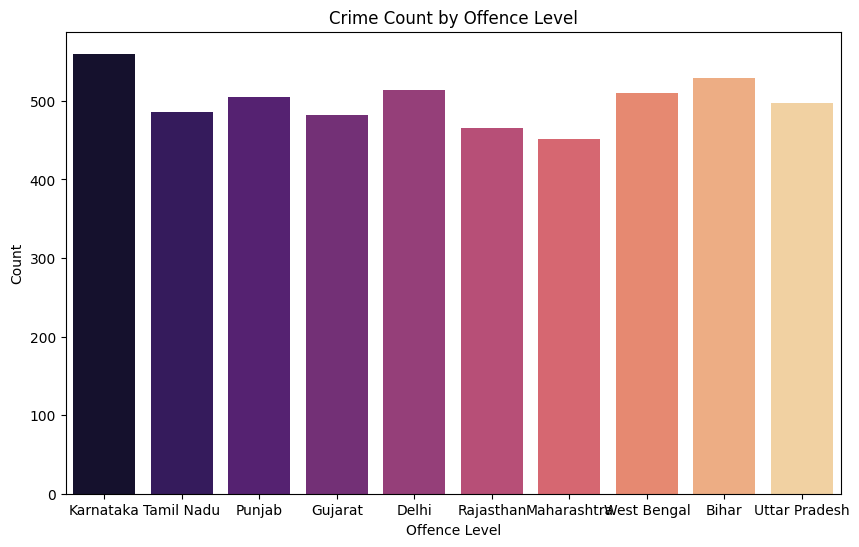

In [ ]:
# Offence Level by Count
offence_level_df = spark.sql("SELECT Offence_Level, COUNT(*) AS Count FROM indiadatabase.df GROUP BY Offence_Level").toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=offence_level_df, x='Offence_Level', y='Count', palette='magma')
plt.title("Crime Count by Offence Level")
plt.xlabel("Offence Level")
plt.ylabel("Count")
plt.show()



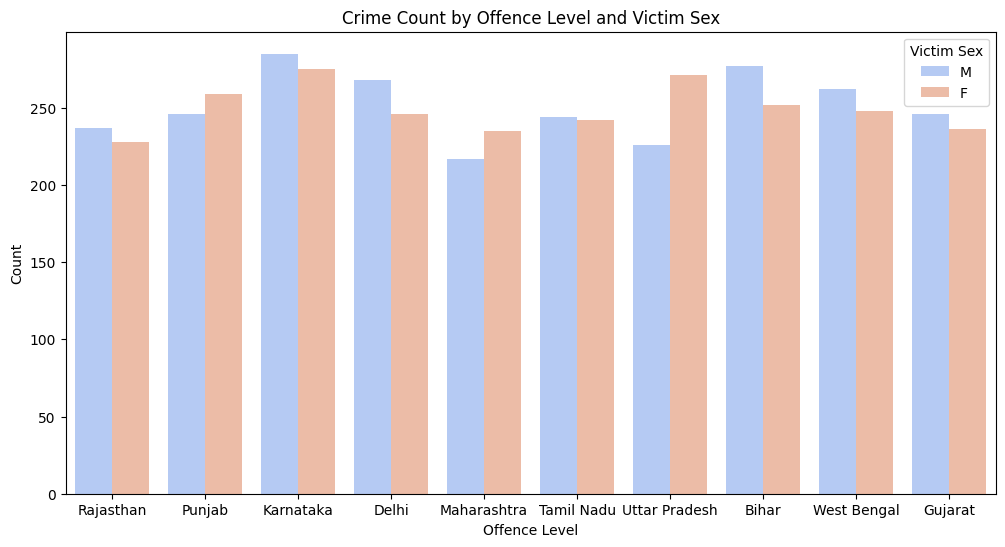

In [ ]:
# Offence Level by Victim Sex

offence_level_sex_df = spark.sql("SELECT Offence_Level, Victim_Sex, COUNT(*) AS Count FROM indiadatabase.df GROUP BY Offence_Level, Victim_Sex").toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=offence_level_sex_df, x='Offence_Level', y='Count', hue='Victim_Sex', palette='coolwarm')
plt.title("Crime Count by Offence Level and Victim Sex")
plt.xlabel("Offence Level")
plt.ylabel("Count")
plt.legend(title='Victim Sex')
plt.show()


<ipython-input-52-4337c6bda76b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=offence_type_df, x='Count', y='Offence_Type', palette='plasma')


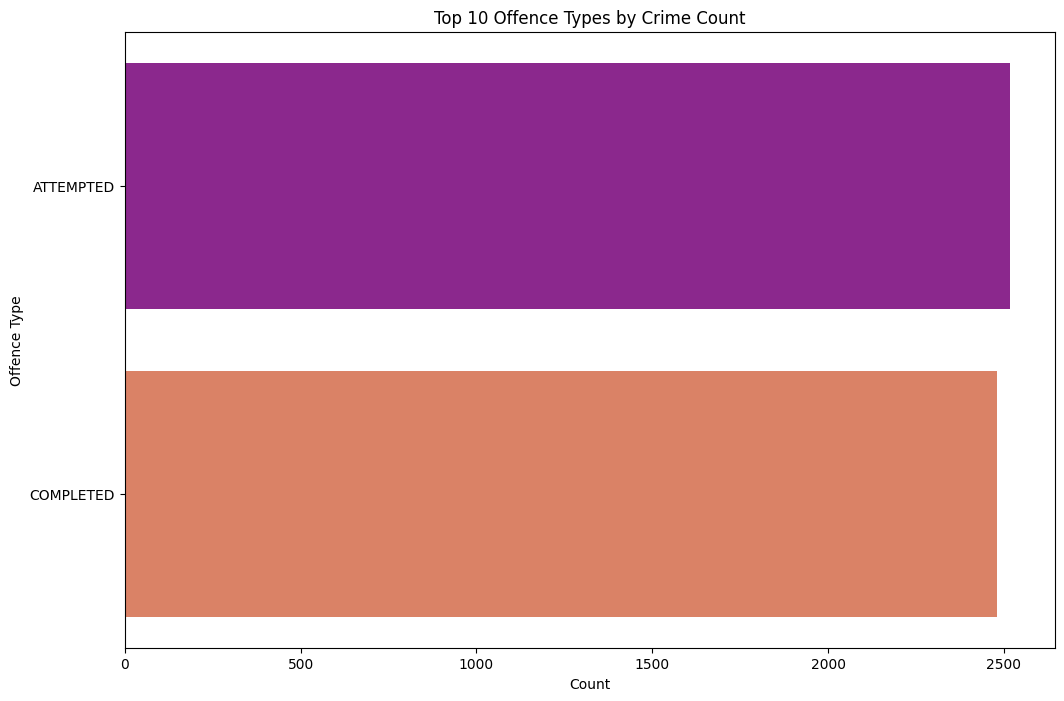

In [ ]:
# Top 10 Offence Types by Count

offence_type_df = spark.sql("SELECT Offence_Type, COUNT(*) AS Count FROM indiadatabase.df GROUP BY Offence_Type ORDER BY Count DESC LIMIT 10").toPandas()

plt.figure(figsize=(12, 8))
sns.barplot(data=offence_type_df, x='Count', y='Offence_Type', palette='plasma')
plt.title("Top 10 Offence Types by Crime Count")
plt.xlabel("Count")
plt.ylabel("Offence Type")
plt.show()


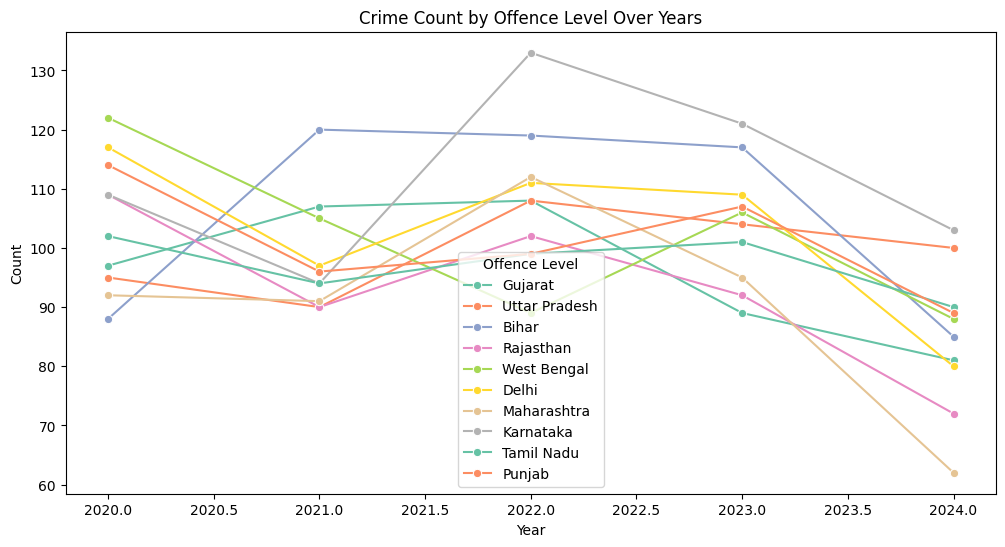

In [ ]:
# Offence Level by Year

offence_year_df = spark.sql("SELECT Offence_Level, Year, COUNT(*) AS Count FROM indiadatabase.df GROUP BY Offence_Level, Year").toPandas()

plt.figure(figsize=(12, 6))
sns.lineplot(data=offence_year_df, x='Year', y='Count', hue='Offence_Level', marker='o', palette='Set2')
plt.title("Crime Count by Offence Level Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='Offence Level')
plt.show()


<ipython-input-54-d53aefd204bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=victim_age_df, x='Victim_Agegroup', y='Count', palette='cubehelix')


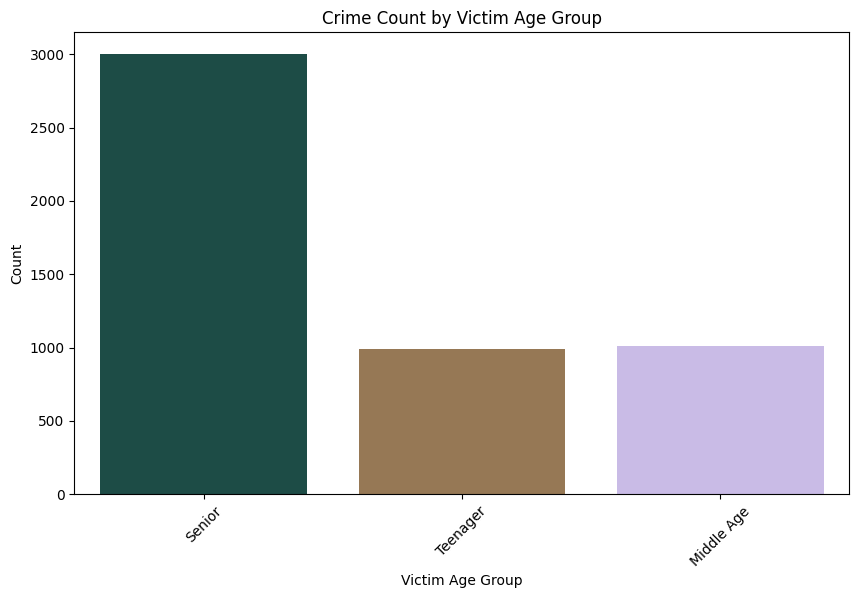

In [ ]:
# Victim Age Group by Count

victim_age_df = spark.sql("SELECT Victim_Agegroup, COUNT(*) AS Count FROM indiadatabase.df GROUP BY Victim_Agegroup").toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=victim_age_df, x='Victim_Agegroup', y='Count', palette='cubehelix')
plt.title("Crime Count by Victim Age Group")
plt.xlabel("Victim Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


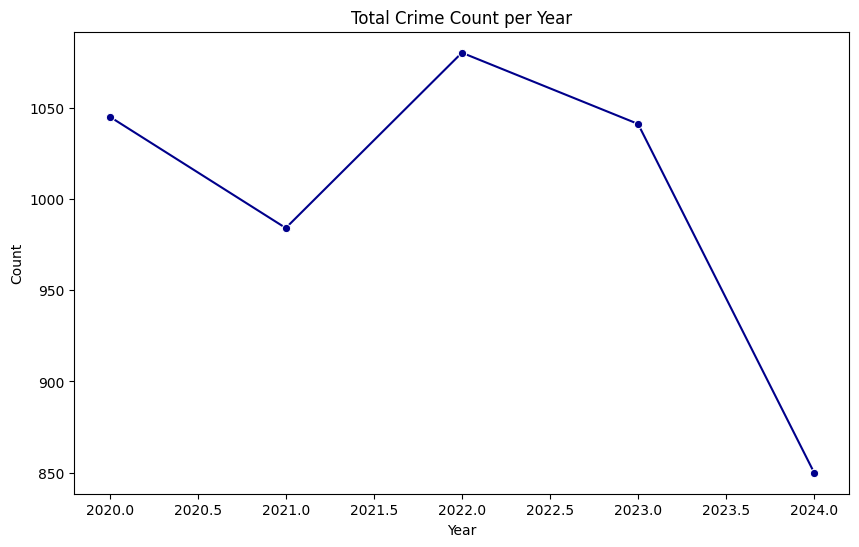

In [ ]:
# Yearly Crime Count

year_df = spark.sql("SELECT Year, COUNT(*) AS Count FROM indiadatabase.df GROUP BY Year").toPandas()

plt.figure(figsize=(10, 6))
sns.lineplot(data=year_df, x='Year', y='Count', marker='o', color='darkblue')
plt.title("Total Crime Count per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


<ipython-input-56-123390ddffb0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_df, x='Month', y='Count', palette='cool')


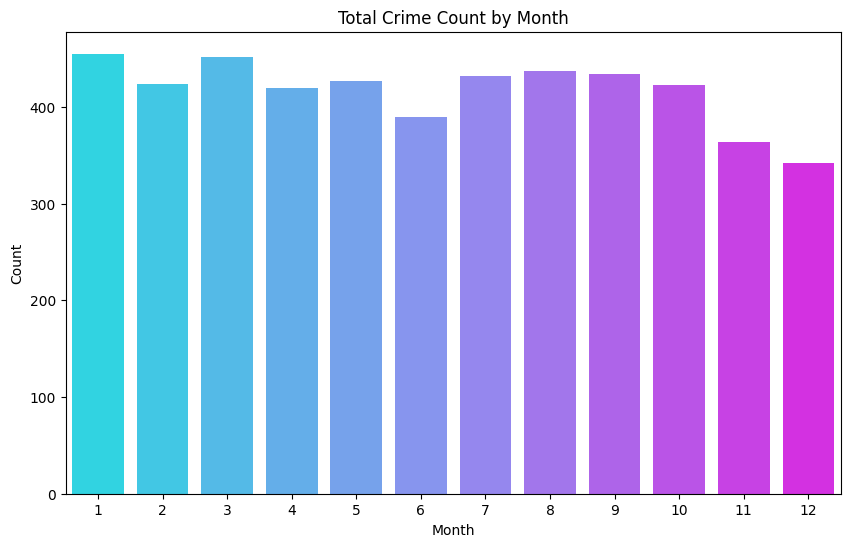

In [ ]:
# Monthly Crime Count

month_df = spark.sql("SELECT Month, COUNT(*) AS Count FROM indiadatabase.df GROUP BY Month").toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=month_df, x='Month', y='Count', palette='cool')
plt.title("Total Crime Count by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()
